In [6]:
import warnings
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib

In [8]:
df = pd.read_excel(r"C:\Users\ASUS\PycharmProjects\testapp\file\datasheet.xlsx")

furniture = df.loc[df['Category'] == 'Furniture']

In [10]:
furniture.head()

,Order ID,Orderdate,Customer ID,State,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-08-11 00:00:00,CG-12520,Kentucky,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-08-11 00:00:00,CG-12520,Kentucky,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,US-2015-108966,2015-11-10 00:00:00,SO-20335,Florida,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,CA-2014-115812,2014-09-06 00:00:00,BH-11710,California,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,CA-2014-115812,2014-09-06 00:00:00,BH-11710,California,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [18]:
df.dtypes

Order ID         object
Orderdate        object
Customer ID      object
State            object
Product ID       object
Category         object
Sub-Category     object
Product Name     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [30]:
furniture['Orderdate'] = pd.to_datetime(furniture.Orderdate)

In [31]:
furniture.dtypes


Orderdate    datetime64[ns]
Sales               float64
dtype: object

In [32]:
furniture.head()

,Orderdate,Sales
0,2016-08-11,261.9600
1,2016-08-11,731.9400
3,2015-11-10,957.5775
5,2014-09-06,48.8600
10,2014-09-06,1706.1840


In [26]:
ts = pd.to_datetime('2016-08-11')

Timestamp('2016-08-11 00:00:00')

In [33]:
furniture.Orderdate.min()

Timestamp('2014-01-03 00:00:00')

In [34]:
furniture.Orderdate.max()

Timestamp('2017-12-30 00:00:00')

In [35]:
# DAta Processing

In [37]:
furniture.isnull().sum()

Orderdate    0
Sales        0
dtype: int64

In [38]:
furniture = furniture.groupby('Orderdate')['Sales'].sum().reset_index()

In [39]:
furniture.head()

,Orderdate,Sales
0,2014-01-03,1893.995
1,2014-01-06,2024.060
2,2014-01-08,44.128
3,2014-01-11,100.384
4,2014-01-12,4513.606


In [41]:
##Indexing with time series data

In [42]:
furniture = furniture.set_index('Orderdate')
furniture.index

DatetimeIndex(['2014-01-03', '2014-01-06', '2014-01-08', '2014-01-11',
               '2014-01-12', '2014-01-13', '2014-01-14', '2014-01-16',
               '2014-01-19', '2014-01-20',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Orderdate', length=889, freq=None)

In [43]:
f_mean = furniture['Sales'].resample('MS').mean()

In [45]:
f_mean['2017':]

Orderdate
2017-01-01     925.827053
2017-02-01    1049.935400
2017-03-01     621.655512
2017-04-01     557.245886
2017-05-01     539.623495
2017-06-01     771.083705
2017-07-01     638.451841
2017-08-01     965.216000
2017-09-01     996.806227
2017-10-01     753.598800
2017-11-01    1242.404375
2017-12-01     973.765627
Freq: MS, Name: Sales, dtype: float64

In [46]:
# Visualizing furniture sales time series data

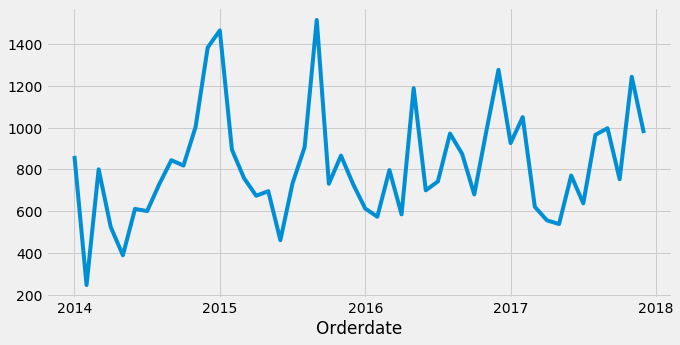

In [48]:
f_mean.plot(figsize=(10, 5))
plt.show()

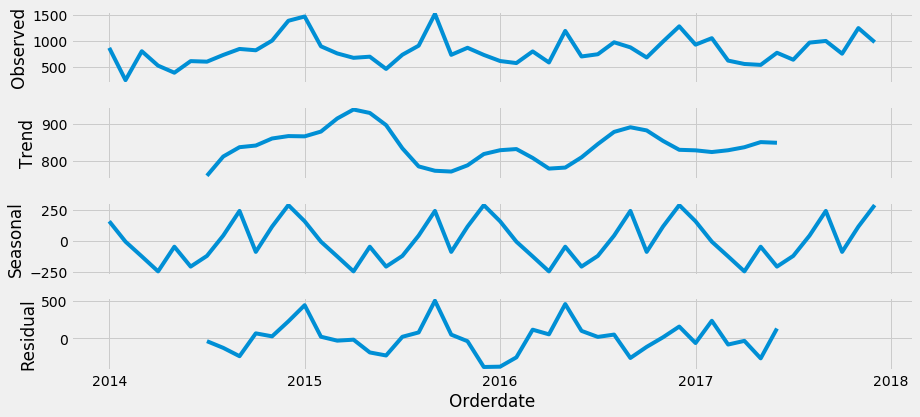

In [50]:
from pylab import rcParams
rcParams['figure.figsize'] = 13, 6

decomposition = sm.tsa.seasonal_decompose(f_mean, model='additive')
fig = decomposition.plot()
plt.show()


In [51]:
# ARIMA MODEL

In [52]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [55]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(f_mean,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:770.4206789110617
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1520.8315233569567
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:511.7627552346454
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:529.4228051599147
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1311.6178989114462
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:334.77746753634335
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:719.2808934694091
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2767.59523433721
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:494.3416759022525
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:526.957599712944
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2694.8299280568117
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:336.6812995586065
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:656.2729114486209
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1220.0862156290655
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:507.5920802122664
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:504.0248882247784
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1192.2083779915288
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:337.5123296425246
ARIMA(

In [56]:
mod = sm.tsa.statespace.SARIMAX(f_mean,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0028      0.363      0.008      0.994      -0.709       0.715
ma.L1         -1.0000      0.233     -4.292      0.000      -1.457      -0.543
ar.S.L12      -0.6317      0.136     -4.658      0.000      -0.897      -0.366
sigma2      5.471e+04   4.26e-06   1.28e+10      0.000    5.47e+04    5.47e+04


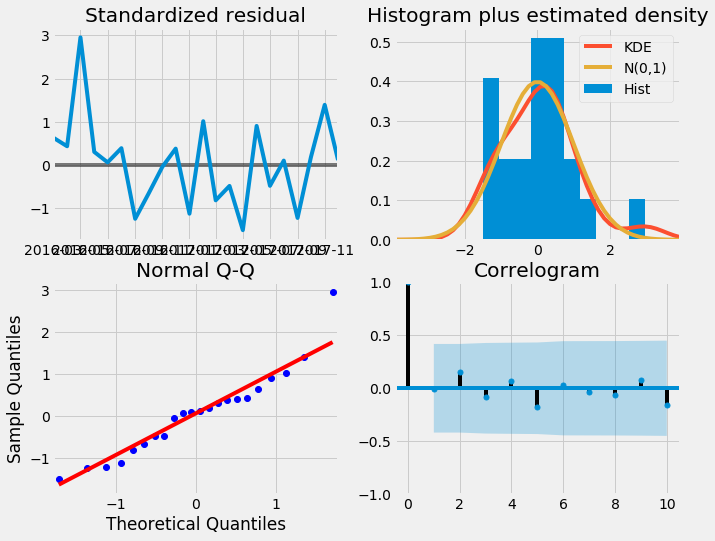

In [58]:
results.plot_diagnostics(figsize=(10, 8))
plt.show()

In [59]:
## Validating forecasts

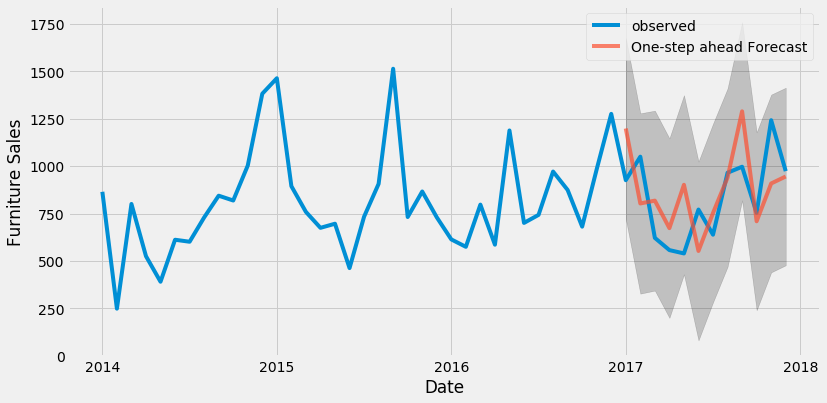

In [62]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = f_mean['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(12, 6))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()


In [64]:
y_forecasted = pred.predicted_mean
y_truth = f_mean['2017-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 48289.21


In [65]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 219.75


In [66]:
## Producing and visualizing forecasts

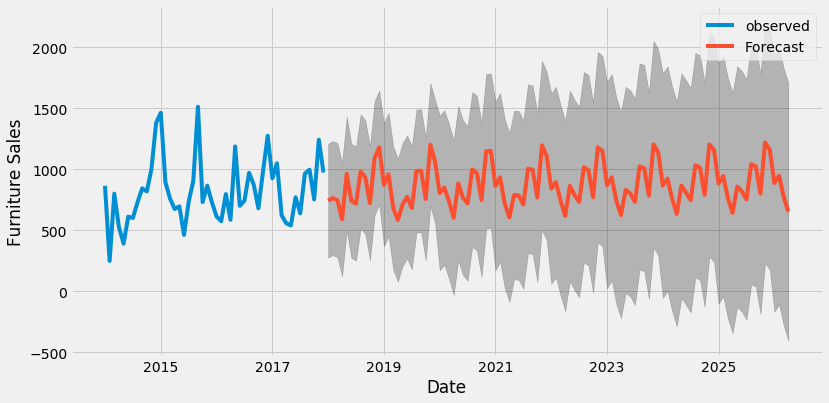

In [68]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = f_mean.plot(label='observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()
